# HW3: Problem 3 Classification Comparison with Synthetic Data


* Write a jupyter notebook. 
* It is essential that you include markdown cells explaining what you are doing at each step.

* You are going to compare the classification algorithms you have learned:

1.  Naive Bayes Classification
2.  Logistic Regression
3.  Quadradic Discriminant Analysis
4.  SVM using radial basis functions (RBF)
5.  Decision Tree
6.  KNN with K = 1

So make sure you run each of these algorithms on the data sets you will create to test.

* The goal is to create 4 synthetic data examples with 2D input data, 2 classes, to use to compare the algorithms. 
* You should use a combination of the following 3 synthetic functions to make your examples:
-   [sklearn.datasets.make_blobs](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html#sklearn.datasets.make_blobs)
-   [sklearn.datasets.make_circles](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_circles.html#sklearn.datasets.make_circles)
-   [sklearn.datasets.make_moons](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html#sklearn.datasets.make_moons)

* You may use a combination of the above in the same example. For example, one class could come from a moon and the other class from a circle in the same example. You could also make one class is a combination of a moon bending oneway and a moon bending the other if that worked better for your example.
* Your examples should be such that:

1.  One of the four examples will be two well-separated blob classes. This example show that all the classifiers work pretty well (near-perfect or perfect classification)
2.  In the two of the data examples, the linear classifier (logistic regression) should do more poorly (both in training and test evaluation) than the others
3.  In the second example the quadratic should do very well (both in training and testing) but the linear classifier should do poorly. The SVM, Decision Tree, and KNN should also do better than the Logistic Regressioon
4.  In the third example you should be able to construct an example where the decision tree and KNN both overfit so the training error is small but the testing error is large, and linear regression does better
5.  The fourth example should be such that SVM and KNN do better than the others (in testing error)

In your evaluations, you should always split the data set into a training and test set using [sklearn.model_selection.train_test_split ](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html#sklearn.model_selection.train_test_split) and also create a report using [sklearn.metrics.classification_report](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html#sklearn.metrics.classification_report)

There should be both an evaluation for training which means fit on training test on training (evaluation of fit) and testing which means fit on training but test on the testing data with the training fit!
Never, ever, fit on training data!!!

Since you are working with 2D data you should also create a set of visualized comparisons like those here:

<div
data-ephox-embed-iri="https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html#sphx-glr-auto-examples-classification-plot-classifier-comparison-py"
style="max-width: 650px; border: 1px solid #aaaaaa; box-shadow: rgba(0, 0, 0, 0.14) 0px 2px 2px 0px, rgba(0, 0, 0, 0.2) 0px 3px 1px -2px, rgba(0, 0, 0, 0.12) 0px 1px 5px 0px; padding: 10px; overflow: hidden; margin-bottom: 1em;">
<p><a
href="https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html#sphx-glr-auto-examples-classification-plot-classifier-comparison-py"
style="text-decoration: none; color: inherit;"><img
src="https://scikit-learn.org/stable/_static/scikit-learn-logo-small.png"
style="max-width: 180px; max-height: 180px; margin-left: 2em; float: right;" /></a>
<a
href="https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html#sphx-glr-auto-examples-classification-plot-classifier-comparison-py"
style="text-decoration: none; color: inherit;"><span
style="font-size: 1.2em; display: block;">Classifier comparison</span>
<span style="margin-top: 0.5em; display: block;">A comparison of a
several classifiers in scikit-learn on synthetic datasets. The point of
this example is to illustrate the nature of decision boundaries of
different classifiers. This should be ta...</span> <span
style="color: #999999; display: block; margin-top: 0.5em;">scikit-learn</span></a></p>
</div>

You can use these visualizations and comparisons as inspiration but you should develop your own. Don\'t forget to see your random numbers! For some more idea on how to generate the synthetic data please read these examples too:

<div
data-ephox-embed-iri="https://scikit-learn.org/stable/modules/clustering.html#clustering"
style="max-width: 650px; border: 1px solid #aaaaaa; box-shadow: rgba(0, 0, 0, 0.14) 0px 2px 2px 0px, rgba(0, 0, 0, 0.2) 0px 3px 1px -2px, rgba(0, 0, 0, 0.12) 0px 1px 5px 0px; padding: 10px; overflow: hidden; margin-bottom: 1em;">
<p><a
href="https://scikit-learn.org/stable/modules/clustering.html#clustering"
style="text-decoration: none; color: inherit;"><img
src="https://scikit-learn.org/stable/_images/sphx_glr_plot_cluster_comparison_001.png"
style="max-width: 180px; max-height: 180px; margin-left: 2em; float: right;" /></a>
<a
href="https://scikit-learn.org/stable/modules/clustering.html#clustering"
style="text-decoration: none; color: inherit;"><span
style="font-size: 1.2em; display: block;">2.3. Clustering</span> <span
style="margin-top: 0.5em; display: block;">Clustering of unlabeled data
can be performed with the module sklearn.cluster. Each clustering
algorithm comes in two variants: a class, that implements the fit method
to learn the clusters on trai...</span> <span
style="color: #999999; display: block; margin-top: 0.5em;">scikit-learn</span></a></p>
</div>


## Imports

In [6]:
# Suppress DeprecationWarning
import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Auxillary imports
from sklearn.datasets import make_blobs, make_circles, make_moons
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.pipeline import make_pipeline

# Model imports
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis   # I do not remember learning about this
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [87]:
# Seed
SEED = 42

# Test size
TEST_SIZE = 0.3

# Color
CM_RB = ListedColormap(["#FF0000", "#0000FF"])
CM = plt.cm.RdBu

# Data generator parameters
NUM_SAMPLES = 200
CENTERS = 2
NUM_FEATURES = 2

# Classifiers
CLASSIFIERS = {
    'Naive Bayes': GaussianNB(),
    'Logistic Regression': LogisticRegression(),
    'QDA': QuadraticDiscriminantAnalysis(),
    'Decision Tree': DecisionTreeClassifier(),
    'SVM': SVC(kernel='rbf'),
    'KNN': KNeighborsClassifier(n_neighbors=1)
}

## Part 1 - Well Separated Classes

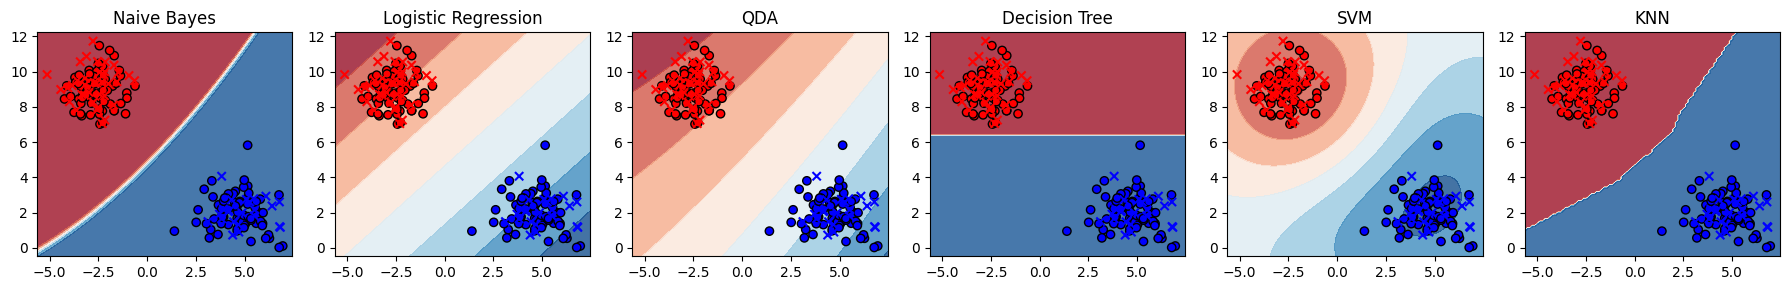

In [88]:
# Make 2 separable blobs
X, y = make_blobs(n_samples=NUM_SAMPLES, centers=CENTERS, n_features=NUM_FEATURES, random_state=SEED)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TEST_SIZE, random_state=SEED)

fig = plt.figure(figsize=(18, 3))
i = 1

# Train, predict, plot
class_reps_train = {}
class_reps_test = {}
for name, clf in CLASSIFIERS.items():
    ax = plt.subplot(1, len(CLASSIFIERS.keys()), i)

    # Fit classifier
    clf = make_pipeline(StandardScaler(), clf)
    clf.fit(X_train, y_train)

    # Make predictions and save
    y_train_pred = clf.predict(X_train)
    y_test_pred = clf.predict(X_test)
    cr_train = classification_report(y_train, y_train_pred, output_dict=True)
    cr_test = classification_report(y_test, y_test_pred, output_dict=True)
    class_reps_train[name] = cr_train
    class_reps_test[name] = cr_test
    
    DecisionBoundaryDisplay.from_estimator(
        clf, X, cmap=CM, alpha=0.8, ax=ax, eps=0.5
    )
    plt.scatter(x=X_train[:, 0], y=X_train[:, 1], c=y_train, cmap=CM_RB, edgecolors='k')
    plt.scatter(x=X_test[:, 0], y=X_test[:, 1], c=y_test, cmap=CM_RB, marker='x')
    ax.set_title(name)

    i += 1

plt.tight_layout()
plt.show()

In [89]:
# Accuracy
for name in CLASSIFIERS.keys():
    clf_train = class_reps_train[name]
    clf_test = class_reps_test[name]
    print(f'{name}: Training accuracy - {clf_train["accuracy"]:.2f}, Testing accuracy - {clf_test["accuracy"]:.2f}')

Naive Bayes: Training accuracy - 1.00, Testing accuracy - 1.00
Logistic Regression: Training accuracy - 1.00, Testing accuracy - 1.00
QDA: Training accuracy - 1.00, Testing accuracy - 1.00
Decision Tree: Training accuracy - 1.00, Testing accuracy - 1.00
SVM: Training accuracy - 1.00, Testing accuracy - 1.00
KNN: Training accuracy - 1.00, Testing accuracy - 1.00


## Part 2 - Bad for Logistic Regression

## Part 3 - Bad for KNN and Decision Tree

The blobs with large standard deviations will work on this one since a linear separation boundary will be much better than KNN and Decision Tree fitting to the noise.

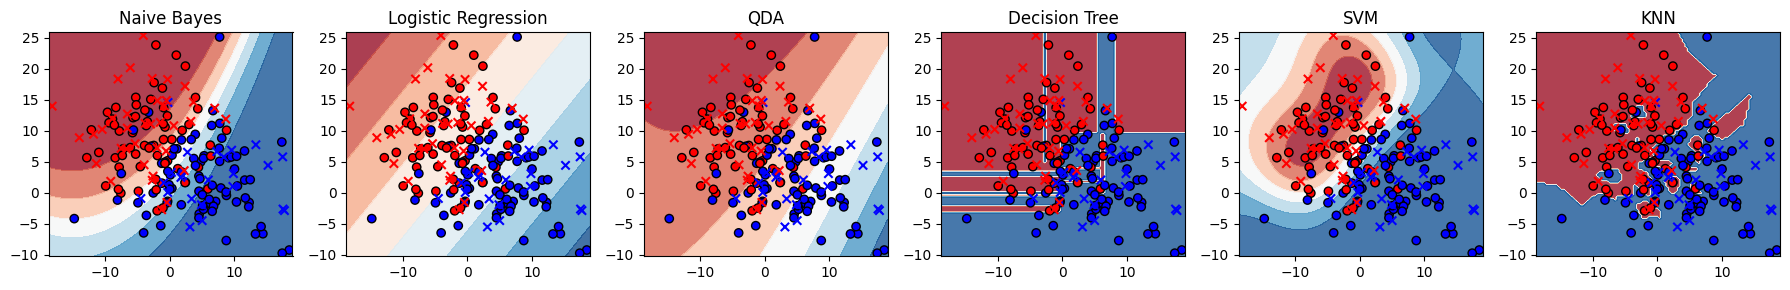

In [90]:
# Make moons with high noise
X, y = make_blobs(n_samples=NUM_SAMPLES, centers=CENTERS, n_features=NUM_FEATURES, 
                  random_state=SEED, cluster_std=6)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TEST_SIZE, random_state=SEED)

fig = plt.figure(figsize=(18, 3))
i = 1

# Train, predict, plot
class_reps_train = {}
class_reps_test = {}
for name, clf in CLASSIFIERS.items():
    ax = plt.subplot(1, len(CLASSIFIERS.keys()), i)

    # Fit classifier
    clf = make_pipeline(StandardScaler(), clf)
    clf.fit(X_train, y_train)

    # Make predictions and save
    y_train_pred = clf.predict(X_train)
    y_test_pred = clf.predict(X_test)
    cr_train = classification_report(y_train, y_train_pred, output_dict=True)
    cr_test = classification_report(y_test, y_test_pred, output_dict=True)
    class_reps_train[name] = cr_train
    class_reps_test[name] = cr_test
    
    DecisionBoundaryDisplay.from_estimator(
        clf, X, cmap=CM, alpha=0.8, ax=ax, eps=0.5
    )
    plt.scatter(x=X_train[:, 0], y=X_train[:, 1], c=y_train, cmap=CM_RB, edgecolors='k')
    plt.scatter(x=X_test[:, 0], y=X_test[:, 1], c=y_test, cmap=CM_RB, marker='x')
    ax.set_title(name)

    i += 1

plt.tight_layout()
plt.show()

### Notes

Not a huge difference in test accuracy but KNN and Decision overfit.

In [91]:
# Accuracy
for name in CLASSIFIERS.keys():
    clf_train = class_reps_train[name]
    clf_test = class_reps_test[name]
    print(f'{name}: Training accuracy - {clf_train["accuracy"]:.2f}, Testing accuracy - {clf_test["accuracy"]:.2f}')

Naive Bayes: Training accuracy - 0.82, Testing accuracy - 0.90
Logistic Regression: Training accuracy - 0.81, Testing accuracy - 0.88
QDA: Training accuracy - 0.81, Testing accuracy - 0.88
Decision Tree: Training accuracy - 1.00, Testing accuracy - 0.87
SVM: Training accuracy - 0.85, Testing accuracy - 0.87
KNN: Training accuracy - 1.00, Testing accuracy - 0.87
